# Foundations for inference

Statistical inference is concerned with understanding and  drawing conclusions out of data. Relying on the quality of parameter estimates.

**N.B : ** We are going to work on the yrbss file sample used in the book.  The data were retrieved through the website : https://www.cdc.gov/healthyyouth/data/yrbs/data.htm, and focused and the 2013 survey to match the datas from the book

## 4.1 Variability in estimates

We want to try to estimate some features out of the YRBSS file using **samples** :

    1. The average height of high schoolers
    2. The average weight 
    3. How many days per week do they practice weight training

### Uploading the Yrbss file

In [1]:
import pandas as pd
import numpy as np

**N.B :** The data have been formatted and cleaned to meet the book example. Look at the process in the separate file.<br/>
**cf :** https://github.com/chikoungoun/OpenIntro/blob/master/Chapter%204/Yrbss_file_formatting.ipynb

In [2]:
df = pd.read_csv('../Dataset/yrbss.csv',index_col=0)
df.head(15)

,age,gender,grade,height,weight,helmet,active,lifting
0,12.0,male,10.0,1.75,65.77,never,1.0,0.0
1,12.0,male,12.0,1.70,54.89,never,2.0,1.0
2,12.0,male,9.0,1.73,65.77,never,1.0,7.0
3,13.0,male,9.0,1.78,55.79,always,1.0,6.0
4,13.0,male,9.0,1.73,82.56,always,2.0,0.0
5,13.0,male,9.0,1.78,65.77,never,1.0,7.0
6,13.0,male,9.0,1.75,88.45,never,2.0,6.0
7,14.0,male,9.0,1.60,54.43,never,2.0,4.0
8,14.0,male,9.0,1.60,54.43,most of the time,2.0,3.0
9,14.0,male,9.0,1.78,66.23,never,1.0,3.0


### 4.1.1 Point estimates

Generally speaking, a point estimate is a statistic parameter (mean, variance, standard deviation,...) used to estimate a parameter in a population, usually applied on samples. 

Usually, estimates vary from a sample to another depending on the sample observations. We call this difference a **sampling variation**. The estimate won't be exactly equal to the population parameter, but will be very close to it.

* **histograms of <i>weight, height, active</i> and <i>lifting</i>**

Creating a sample of 100 observations from the dataframe

In [3]:
sampl = df.sample(n=100)

In [4]:
sampl.head()

,age,gender,grade,height,weight,helmet,active,lifting
3088,16.0,male,10.0,1.83,58.06,rarely,1.0,2.0
4641,17.0,male,12.0,1.78,72.58,not riding,2.0,0.0
4668,17.0,male,11.0,1.85,86.64,never,1.0,5.0
5063,18.0,male,12.0,1.80,72.58,never,2.0,2.0
1798,15.0,male,9.0,1.90,115.67,never,2.0,0.0


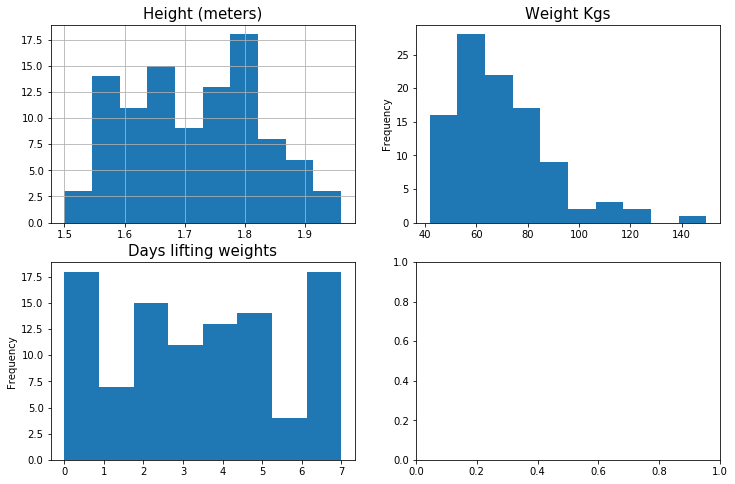

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axarr = plt.subplots(2,2,figsize=(12,8))

#Distribution of height 
sampl['height'].hist(ax=axarr[0][0],)
axarr[0][0].set_title("Height (meters)", fontsize=15)

#Distribution of weight
sampl['weight'].plot.hist(ax=axarr[0][1])
axarr[0][1].set_title("Weight Kgs", fontsize=15)

#Distribution of physical activity in Past week
sampl['lifting'].plot.hist(ax=axarr[1][0],bins=8)
axarr[1][0].set_title("Days lifting weights", fontsize=15)

We will display another randomly selected sample to pinpoint the differences of result

In [6]:
sampl2 = df.sample(n=100)
sampl2.head()

,age,gender,grade,height,weight,helmet,active,lifting
7786,16.0,female,9.0,1.63,68.04,never,2.0,2.0
1241,15.0,male,9.0,1.75,68.04,never,2.0,1.0
8685,16.0,female,10.0,1.57,89.81,never,2.0,0.0
7344,15.0,female,9.0,1.57,53.98,not riding,2.0,5.0
8089,16.0,female,11.0,1.55,58.97,not riding,2.0,2.0


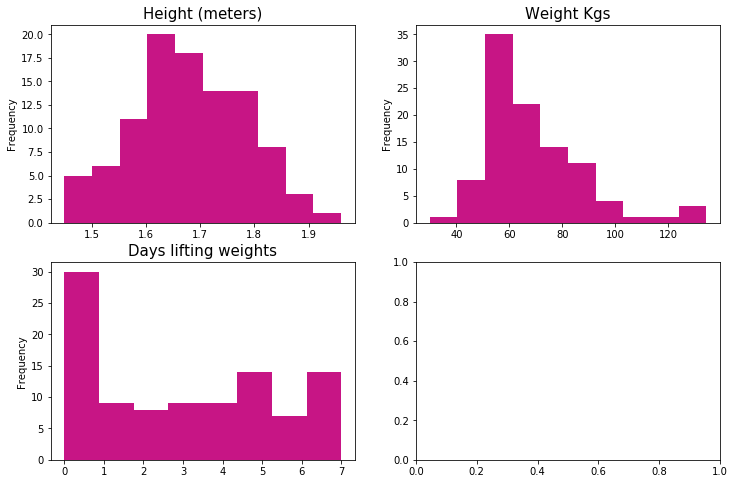

In [7]:
fig, axarr = plt.subplots(2,2,figsize=(12,8))

#Distribution of height 
sampl2['height'].plot.hist(ax=axarr[0][0],color='mediumvioletred')
axarr[0][0].set_title("Height (meters)", fontsize=15)

#Distribution of weight
sampl2['weight'].plot.hist(ax=axarr[0][1],color='mediumvioletred')
axarr[0][1].set_title("Weight Kgs", fontsize=15)

#Distribution of physical activity in Past week
sampl2['lifting'].plot.hist(ax=axarr[1][0],bins=8, color='mediumvioletred')
axarr[1][0].set_title("Days lifting weights", fontsize=15)

- The **height** distribution is somehow symetric in it's shape ( very somehow :p) 
- We can notice in the 2 examples that the **weight** distribution is moderatly skewed to the right
- The **lifting** distribution is pretty similar

Let's calculate the average **weight** and **lifting days**  of the samples :

In [8]:
# sample mean of the weight
print(sampl['weight'].mean())
print(sampl2['weight'].mean())

70.1265
69.1152


In [9]:
# sample mean of the lifting days
print(sampl['lifting'].mean())
print(sampl2['lifting'].mean())

3.42
2.98


* We realize that the average of the samples don't differ that much. Here we compute informations over the population

In [10]:
df['weight'].agg(['mean','median','std'])

mean      67.903099
median    64.860000
std       16.956465
Name: weight, dtype: float64

In [11]:
df.lifting.agg(['mean','median','std'])

mean      2.967510
median    3.000000
std       2.575564
Name: lifting, dtype: float64

### 4.1.2 Point estimates are not exact

Estimates are not exactly equal to the truth but tend to get better as more data gets added in.

**Running mean** is a sequence of means that adds up by adding a new observation in its calculation

**N.B : ** We will be working with the weight instead of the days of activity 

* **Graphing a Running mean for <i> weight</i> sample**

In [12]:
# we will need a function that computes the sum
def sum(l):
    s = 0
    for i in l:
        s = s + i
    return s

In [13]:
# Calculating a running mean through "lists"
def running_mean(l):
    #convert the series into a list 
    t = l.tolist()
    
    #declaring a result list
    tr = []

    for c,i in enumerate(t[:-1]):
        tr.append(sum(t[0:c+1])/(c+1))
    
    #returning back a series
    return pd.Series(tr)
#P.S : will try to compute with rolling sometime

In [14]:
#Weight sample running mean
wsrm = running_mean(sampl['weight'])

In [15]:
wsrm.head(10)

0    58.060000
1    65.320000
2    72.426667
3    72.465000
4    81.106000
5    77.038333
6    73.161429
7    73.371250
8    70.258889
9    69.039000
dtype: float64

Graphing the **Running mean** of the weight data of the student sample

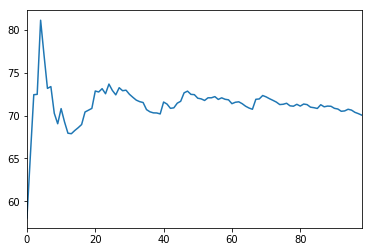

In [16]:
wsrm.plot.line()

In comparison with another sample 

In [17]:
wsrm2 = running_mean(sampl2['weight'])

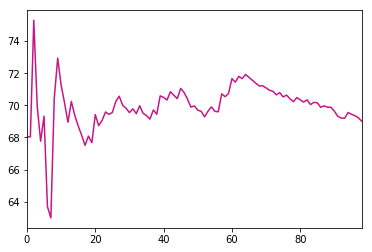

In [18]:
wsrm2.plot.line(color='mediumvioletred')

### 4.1.3 Standard error of the mean

**N.B: ** We will be using the <i>Lifting</i> data

Building up a **sampling distribution** for the sample mean when sample is size 100.

In [19]:
lift1k = []
i=0
while(i<1000):
    lift1k.append(df['lifting'].sample(100).mean())
    i += 1

In [20]:
len(lift1k)

1000

In [21]:
lift_dist = pd.Series(lift1k)

In [22]:
lift_dist.head()

0    2.96
1    2.74
2    3.36
3    3.01
4    2.91
dtype: float64

In [23]:
#Standard deviation of the sample mean
lift_dist.std()

0.26272164483091731

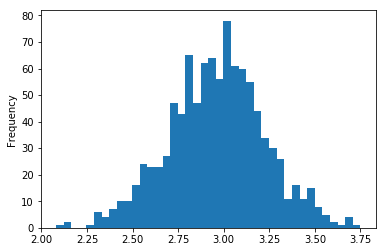

In [24]:
lift_dist.plot.hist(bins=40)

In [25]:
#Population mean
df['lifting'].mean()

2.967509659290481

Population mean $ \mu = 2.967$

In [26]:
#Population Standard deviation
df['lifting'].std()

2.5755635464492657

Population mean $ \sigma = 2.575$

* **Sampling Distribution** :<br/>
    Represents the distribution of the **point estimates** based on fixed sized samples from a certain population

The distribution looks **Unimodal**, approximately **symmetric** and it's centered very close to the **population mean** 

* **<u>Standard Error</u> ** <br/>
We call the standard deviation associated with an estimate as the **Standard Error**. It describes the typical error or uncertainty associated with the estimate.

* **Computing SE (Standard Error) for the sample mean**<br/>
Given <i>n</i> independant observations from a population with standard deviation $\sigma$ the standard error of the sample mean is equal to <br/><br/>
$SE = \frac{\sigma}{\sqrt{n}}$
<br/><br/>
- To ensure sample observations independance, it shouldn't exceed 10% of the population
- The estimate is sufficiently good enough when the sample size is at least 30 and the population, distribution not strongly skewed

**N.B : ** Difference between "Standard Deviation" and "Standard Error". As they are both a measure of spread, **Standard Deviation** uses **parameters** (population), and **Standard Error** uses **statistics** (sample) 